## Observations and Insights 

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combinedDF = mouse_metadata.merge(study_results, on='Mouse ID')
# Display the data table for preview
combinedDF.head(5)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
#study_results.head(1)
cntStudy = study_results["Mouse ID"].count()
cntStudy

1893

In [10]:
#mouse_metadata.head(1)
cntMouses = mouse_metadata["Mouse ID"].count()
cntMouses

249

In [11]:
# Checking the number of mice.
#combinedDF.count()
cnts = combinedDF["Mouse ID"].count()
uniCnts = combinedDF["Mouse ID"].nunique()
output = (f"Mouse ID Counts: {int(cnts)} \n"
          f"Mouse ID Distinct Counts: {int(uniCnts)} \n"
         )
print(output)

Mouse ID Counts: 1893 
Mouse ID Distinct Counts: 249 



In [12]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
groupedDF = combinedDF.groupby(["Mouse ID","Timepoint"]).count()
dupes = groupedDF[groupedDF["Drug Regimen"]>1]
dupes

Drug Regimen  Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
g989     0                     2    2           2           2   
         5                     2    2           2           2   
         10                    2    2           2           2   
         15                    2    2           2           2   
         20                    2    2           2           2   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
g989     0                           2                 2  
         5                           2                 2  
         10                          2                 2  
         15                          2                 2  
         20                          2                 2

In [13]:
# Optional: Get all the data for the duplicate mouse ID. 
combinedDF[combinedDF["Mouse ID"]=="g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanedDF = combinedDF[combinedDF["Mouse ID"] != "g989"]
cleanedDF

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [15]:
# Checking the number of mice in the clean DataFrame.
cleanedDF.nunique()

Mouse ID               248
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1633
Metastatic Sites         5
dtype: int64

## Summary Statistics

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
selectDF = cleanedDF[["Drug Regimen","Tumor Volume (mm3)"]]
groupDF = selectDF.groupby("Drug Regimen")
mean = groupDF["Tumor Volume (mm3)"].mean()
median = groupDF["Tumor Volume (mm3)"].mean()
variance = groupDF["Tumor Volume (mm3)"].var()
std = groupDF["Tumor Volume (mm3)"].std()
sem = groupDF["Tumor Volume (mm3)"].sem()

summaryDF = pd.DataFrame({
    "Mean":mean,
    "Median":median,
    "Variance":variance,
    "Standard Deviation":std,
    "SEM":sem
})

formatSummary= {"Mean":"{0:,.3f}"\
                ,"Median": "{0:,.3f}"\
                ,"Variance": "{0:,.3f}"\
                ,"Standard Deviation": "{0:,.3f}"\
                ,"SEM": "{0:,.3f}"\
              }
summaryDF.style.format(formatSummary)

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.676,40.676,24.948,4.995,0.329
Ceftamin,52.591,52.591,39.290,6.268,0.470
Infubinol,52.885,52.885,43.129,6.567,0.492
Ketapril,55.236,55.236,68.554,8.280,0.604
Naftisol,54.332,54.332,66.173,8.135,0.596
Placebo,54.034,54.034,61.168,7.821,0.581
Propriva,52.321,52.321,43.852,6.622,0.544
Ramicane,40.217,40.217,23.487,4.846,0.321
Stelasyn,54.233,54.233,59.451,7.710,0.573


In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Using the aggregation method, produce the same summary statistics in a single line
aggDF = cleanedDF.groupby("Drug Regimen").agg(**{
        "Mean":("Tumor Volume (mm3)", "mean")
        ,"Median":("Tumor Volume (mm3)","median")
        ,"Variance":("Tumor Volume (mm3)","var")
        ,"Standard Deviation":("Tumor Volume (mm3)","std")
        ,"SEM":("Tumor Volume (mm3)","sem")
})

formatAggDF = {"Mean":"{0:,.3f}"\
                ,"Median": "{0:,.3f}"\
                ,"Variance": "{0:,.3f}"\
                ,"Standard Deviation": "{0:,.3f}"\
                ,"SEM": "{0:,.3f}"\
              }

aggDF.style.format(formatAggDF)

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of Measurements'>

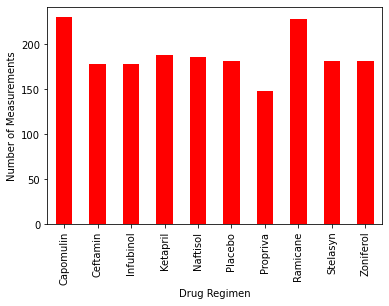

In [68]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
groupDrug = cleanedDF.groupby('Drug Regimen')
countDrug = groupDrug['Drug Regimen'].count()

countChart = countDrug.plot(kind="bar", 
                            facecolor="red", 
                            xlabel="Drug Regimen", 
                            ylabel="Number of Measurements")

countChart

<BarContainer object of 10 artists>

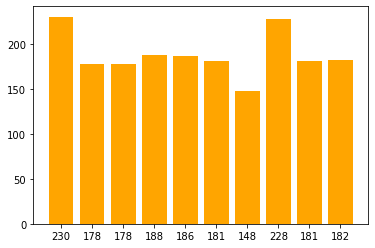

In [69]:
#########################
########REVISIT##########
#########################
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

groupDrugPly = cleanedDF.groupby('Drug Regimen')
countDrugPly = groupDrugPly['Drug Regimen'].count()

xAxis=np.arange(len(groupDrugPly))
tickLocs=[value for value in xAxis]
tickLocs

plt.bar(xAxis, countDrugPly, color="orange", tick_label=countDrugPly)
# plt.xticks=(tickLocs, groupDrugPly["Drug Regimen"])
# plt.xlabel="Drug Regimen"
# plt.ylabel="Number of Measurements"


<AxesSubplot:title={'center':'By Sex'}, ylabel='Sex'>

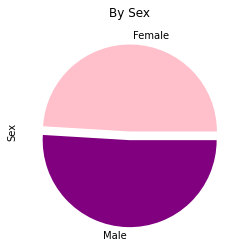

In [67]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
groupGen = cleanedDF.groupby('Sex')
countGen = groupGen['Sex'].count()

countChart = countGen.plot(kind="pie" 
                        ,title="By Sex"
                        ,colors=['pink','purple']
                        ,explode=[0,.1])

# countChart.set_xlabel("Drug Regimen")
# countChart.set_ylabel("Number of Measurements")

countChart


In [ ]:
#########################
########REVISIT##########
#########################
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
